In [171]:
import pandas as pd
import seaborn as sns
import datetime
import numpy as np
pd.options.display.max_columns = None
import matplotlib.pyplot as plt

In [15]:
train = pd.read_excel('Data_Train.xlsx')
print(train.shape)
train.head()

(6019, 13)


,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price
0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,26.6 km/kg,998 CC,58.16 bhp,5.0,NaN,1.75
1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67 kmpl,1582 CC,126.2 bhp,5.0,NaN,12.50
2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.2 kmpl,1199 CC,88.7 bhp,5.0,8.61 Lakh,4.50
3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.77 kmpl,1248 CC,88.76 bhp,7.0,NaN,6.00
4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.2 kmpl,1968 CC,140.8 bhp,5.0,NaN,17.74


In [16]:
test = pd.read_excel('Data_Test.xlsx')
print(test.shape)
test.head()

(1234, 12)


,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price
0,Maruti Alto K10 LXI CNG,Delhi,2014,40929,CNG,Manual,First,32.26 km/kg,998 CC,58.2 bhp,4.0,NaN
1,Maruti Alto 800 2016-2019 LXI,Coimbatore,2013,54493,Petrol,Manual,Second,24.7 kmpl,796 CC,47.3 bhp,5.0,NaN
2,Toyota Innova Crysta Touring Sport 2.4 MT,Mumbai,2017,34000,Diesel,Manual,First,13.68 kmpl,2393 CC,147.8 bhp,7.0,25.27 Lakh
3,Toyota Etios Liva GD,Hyderabad,2012,139000,Diesel,Manual,First,23.59 kmpl,1364 CC,null bhp,5.0,NaN
4,Hyundai i20 Magna,Mumbai,2014,29000,Petrol,Manual,First,18.5 kmpl,1197 CC,82.85 bhp,5.0,NaN


# Combining Train and Test dataset

In [17]:
train['is_train'] = 1
test['is_train'] = 0

In [103]:
df= pd.concat([train, test], axis=0)
df.head()

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price,is_train
0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,26.6 km/kg,998 CC,58.16 bhp,5.0,NaN,1.75,1
1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67 kmpl,1582 CC,126.2 bhp,5.0,NaN,12.50,1
2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.2 kmpl,1199 CC,88.7 bhp,5.0,8.61 Lakh,4.50,1
3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.77 kmpl,1248 CC,88.76 bhp,7.0,NaN,6.00,1
4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.2 kmpl,1968 CC,140.8 bhp,5.0,NaN,17.74,1


# Data pre-processing

In [104]:
df.Location.unique()

array(['Mumbai', 'Pune', 'Chennai', 'Coimbatore', 'Hyderabad', 'Jaipur',
       'Kochi', 'Kolkata', 'Delhi', 'Bangalore', 'Ahmedabad'],
      dtype=object)

In [105]:
df.isna().sum()

Name                    0
Location                0
Year                    0
Kilometers_Driven       0
Fuel_Type               0
Transmission            0
Owner_Type              0
Mileage                 2
Engine                 46
Power                  46
Seats                  53
New_Price            6247
Price                1234
is_train                0
dtype: int64

In [106]:
df.dtypes

Name                  object
Location              object
Year                   int64
Kilometers_Driven      int64
Fuel_Type             object
Transmission          object
Owner_Type            object
Mileage               object
Engine                object
Power                 object
Seats                float64
New_Price             object
Price                float64
is_train               int64
dtype: object

# Get the manufacturer of the cars

In [107]:
df["Manufacturer"] = df["Name"].apply(lambda x:' '.join(x.split()[:1]))
df["Model"] = df["Name"].apply(lambda x:' '.join(x.split()[1:2]))
df.head()

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price,is_train,Manufacturer,Model
0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,26.6 km/kg,998 CC,58.16 bhp,5.0,NaN,1.75,1,Maruti,Wagon
1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67 kmpl,1582 CC,126.2 bhp,5.0,NaN,12.50,1,Hyundai,Creta
2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.2 kmpl,1199 CC,88.7 bhp,5.0,8.61 Lakh,4.50,1,Honda,Jazz
3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.77 kmpl,1248 CC,88.76 bhp,7.0,NaN,6.00,1,Maruti,Ertiga
4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.2 kmpl,1968 CC,140.8 bhp,5.0,NaN,17.74,1,Audi,A4


In [108]:
df['Manufacturer'] = df['Manufacturer'].replace({'ISUZU': 'Isuzu'})

In [109]:
df.Manufacturer.value_counts()

Maruti           1444
Hyundai          1340
Honda             743
Toyota            507
Mercedes-Benz     380
Volkswagen        374
Ford              351
Mahindra          331
BMW               312
Audi              285
Tata              228
Skoda             202
Renault           170
Chevrolet         151
Nissan            117
Land               67
Jaguar             48
Fiat               38
Mitsubishi         36
Mini               31
Volvo              28
Porsche            19
Jeep               19
Datsun             17
Isuzu               5
Force               3
Bentley             2
OpelCorsa           1
Lamborghini         1
Smart               1
Ambassador          1
Hindustan           1
Name: Manufacturer, dtype: int64

In [110]:
df.Model.unique()

array(['Wagon', 'Creta', 'Jazz', 'Ertiga', 'A4', 'EON', 'Micra', 'Innova',
       'Vento', 'Indica', 'Ciaz', 'City', 'Swift', 'Rover', 'Pajero',
       'Amaze', 'Duster', 'New', '3', 'S', 'A6', 'i20', 'Alto', 'WRV',
       'Corolla', 'Ssangyong', 'Vitara', 'KUV', 'M-Class', 'Polo', 'Nano',
       'Elantra', 'Xcent', 'Thar', 'Grand', 'KWID', 'i10', 'X-Trail',
       'Zen', 'Figo', 'C-Class', 'Cayenne', 'XUV500', 'Terrano', 'Brio',
       'Fiesta', 'Santro', 'Zest', 'Ritz', '5', 'Fortuner', 'Ecosport',
       'Verna', 'GO', 'Omni', 'Etios', 'XF', 'Eeco', 'Civic', 'V40', 'B',
       'Scorpio', 'CR-V', 'SLC', '1', 'Beat', 'Rapid', 'RS5', 'Superb',
       'X5', 'GLC', 'Countryman', 'Optra', 'Lodgy', 'E-Class', 'Baleno',
       'Laura', 'NuvoSport', 'Fabia', 'Indigo', 'Q3', 'Octavia', 'A8',
       'Verito', 'Cooper', 'Santa', 'X1', 'Accent', 'Tucson', 'GLE',
       'A-Star', 'Grande', 'X3', 'EcoSport', 'Q7', 'Jetta', 'GLA',
       'Celerio', 'Sumo', 'Accord', '6', 'Manza', 'Spark', 'Clubman'

In [111]:
print(df.Year.unique())

df['Current_year'] = datetime.date.today().year
df.head(1)

[2010 2015 2011 2012 2013 2016 2018 2014 2017 2007 2009 2008 2019 2006
 2005 2004 2002 2000 2003 1999 2001 1998 1996]


,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price,is_train,Manufacturer,Model,Current_year
0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,26.6 km/kg,998 CC,58.16 bhp,5.0,NaN,1.75,1,Maruti,Wagon,2020


In [112]:
df['Car_Age'] = df['Current_year'] - df['Year']
df = df.drop(['Year', 'Current_year'], axis = 1) 
df.head(1)

,Name,Location,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price,is_train,Manufacturer,Model,Car_Age
0,Maruti Wagon R LXI CNG,Mumbai,72000,CNG,Manual,First,26.6 km/kg,998 CC,58.16 bhp,5.0,NaN,1.75,1,Maruti,Wagon,10


# Handling Missing Values

In [113]:
df["Power"] = df["Power"].str.replace('null bhp','0 bhp')
df["Power"].fillna('0 bhp',inplace=True)

df["Mileage"].fillna('0.0 kmpl',inplace=True)

df["Engine"].fillna('0 CC',inplace=True)

df["Seats"].fillna(0,inplace=True)

In [114]:
df["Power"] = df["Power"].apply(lambda x:' '.join(x.split()[:1]))
df["Mileage"] = df["Mileage"].apply(lambda x:' '.join(x.split()[:1]))
df["Engine"] = df["Engine"].apply(lambda x:' '.join(x.split()[:1]))
df.head(1)

,Name,Location,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price,is_train,Manufacturer,Model,Car_Age
0,Maruti Wagon R LXI CNG,Mumbai,72000,CNG,Manual,First,26.6,998,58.16,5.0,NaN,1.75,1,Maruti,Wagon,10


In [115]:
df.New_Price.unique()

array([nan, '8.61 Lakh', '21 Lakh', '10.65 Lakh', '32.01 Lakh',
       '47.87 Lakh', '10.57 Lakh', '12.33 Lakh', '11.12 Lakh',
       '23.64 Lakh', '18.64 Lakh', '19.34 Lakh', '49.14 Lakh',
       '11.81 Lakh', '16.65 Lakh', '6.67 Lakh', '6.45 Lakh', '6.41 Lakh',
       '27 Lakh', '5.13 Lakh', '54.43 Lakh', '9.51 Lakh', '9.96 Lakh',
       '14.44 Lakh', '4.53 Lakh', '95.04 Lakh', '13.49 Lakh', '1.28 Cr',
       '60.88 Lakh', '7.39 Lakh', '69.47 Lakh', '8.78 Lakh', '12.74 Lakh',
       '10.52 Lakh', '11.98 Lakh', '8.54 Lakh', '33.58 Lakh', '9.12 Lakh',
       '5.29 Lakh', '44.28 Lakh', '20.74 Lakh', '11.74 Lakh',
       '25.52 Lakh', '14.07 Lakh', '95.13 Lakh', '8.34 Lakh', '8.85 Lakh',
       '25.4 Lakh', '16.67 Lakh', '79.43 Lakh', '6.62 Lakh', '1.04 Cr',
       '58.67 Lakh', '28.37 Lakh', '4.48 Lakh', '72.64 Lakh',
       '36.15 Lakh', '44.59 Lakh', '12 Lakh', '14.65 Lakh', '53.72 Lakh',
       '33.91 Lakh', '12.51 Lakh', '9.74 Lakh', '95.38 Lakh',
       '60.59 Lakh', '11.28 Lakh', 

In [116]:
df["New_Price"]= df["New_Price"].replace(np.nan,'0 Lakh')

In [120]:
df_price = df["New_Price"].str.split(" ",n=1,expand=True)
df_price1 = df_price[0].str.split(".",n=1,expand=True)
df["New_Price"] = df_price1[0].astype(str).astype(int)

df["Cur"] = df_price[1].astype(str)

df.head()

,Name,Location,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price,is_train,Manufacturer,Model,Car_Age,Cur
0,Maruti Wagon R LXI CNG,Mumbai,72000,CNG,Manual,First,26.6,998,58.16,5.0,0,1.75,1,Maruti,Wagon,10,Lakh
1,Hyundai Creta 1.6 CRDi SX Option,Pune,41000,Diesel,Manual,First,19.67,1582,126.2,5.0,0,12.50,1,Hyundai,Creta,5,Lakh
2,Honda Jazz V,Chennai,46000,Petrol,Manual,First,18.2,1199,88.7,5.0,8,4.50,1,Honda,Jazz,9,Lakh
3,Maruti Ertiga VDI,Chennai,87000,Diesel,Manual,First,20.77,1248,88.76,7.0,0,6.00,1,Maruti,Ertiga,8,Lakh
4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,40670,Diesel,Automatic,Second,15.2,1968,140.8,5.0,0,17.74,1,Audi,A4,7,Lakh


In [ ]:
def cal_cur(val_cur):
    val,cur = val_cur
    if cur=='Cr':
        val = val*100
    return val

df["New_Price"] = df[["New_Price",'Cur']].apply(cal_cur, axis=1)

In [124]:
df["Power"].replace(0,np.nan,inplace=True)
df["Mileage"].replace(0,np.nan,inplace=True)
df["Engine"].replace(0,np.nan,inplace=True)
df["Seats"].replace(0,np.nan,inplace=True)
df["New_Price"].replace(0,np.nan,inplace=True)

In [128]:
df.isna().sum()

Name                    0
Location                0
Kilometers_Driven       0
Fuel_Type               0
Transmission            0
Owner_Type              0
Mileage                 0
Engine                  0
Power                   0
Seats                  54
New_Price            6247
Price                1234
is_train                0
Manufacturer            0
Model                   0
Car_Age                 0
Cur                     0
dtype: int64

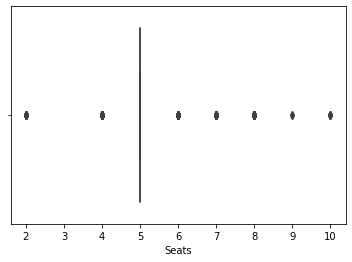

In [129]:
sns.boxplot(df.Seats)

In [130]:
df.Seats.unique()

array([ 5.,  7.,  8.,  4.,  6.,  2., nan, 10.,  9.])

In [131]:
df[df.Seats.isna()]

,Name,Location,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price,is_train,Manufacturer,Model,Car_Age,Cur
194,Honda City 1.5 GXI,Ahmedabad,60006,Petrol,Manual,First,0.0,0,0,NaN,NaN,2.95,1,Honda,City,13,Lakh
208,Maruti Swift 1.3 VXi,Kolkata,42001,Petrol,Manual,First,16.1,0,0,NaN,NaN,2.11,1,Maruti,Swift,10,Lakh
229,Ford Figo Diesel,Bangalore,70436,Diesel,Manual,First,0.0,1498,99,NaN,NaN,3.60,1,Ford,Figo,5,Lakh
733,Maruti Swift 1.3 VXi,Chennai,97800,Petrol,Manual,Third,16.1,0,0,NaN,NaN,1.75,1,Maruti,Swift,14,Lakh
749,Land Rover Range Rover 3.0 D,Mumbai,55001,Diesel,Automatic,Second,0.0,0,0,NaN,NaN,26.50,1,Land,Rover,12,Lakh
1294,Honda City 1.3 DX,Delhi,55005,Petrol,Manual,First,12.8,0,0,NaN,NaN,3.20,1,Honda,City,11,Lakh
1327,Maruti Swift 1.3 ZXI,Hyderabad,50295,Petrol,Manual,First,16.1,0,0,NaN,NaN,5.80,1,Maruti,Swift,5,Lakh
1385,Honda City 1.5 GXI,Pune,115000,Petrol,Manual,Second,0.0,0,0,NaN,NaN,1.50,1,Honda,City,16,Lakh
1460,Land Rover Range Rover Sport 2005 2012 Sport,Coimbatore,69078,Petrol,Manual,First,0.0,0,0,NaN,NaN,40.88,1,Land,Rover,12,Lakh
1917,Honda City 1.5 EXI,Jaipur,88000,Petrol,Manual,Second,13.0,1493,100,NaN,NaN,1.70,1,Honda,City,15,Lakh


In [135]:
# this can be seen that most of the rows with empty Seats values should have 5 in that column
df['Seats'].fillna(5,inplace= True)

In [137]:
def impute_median(series):
    return series.fillna(series.median())

by_Model = df.groupby(['Model'])
df["New_Price"] = by_Model['New_Price'].transform(impute_median)

In [ ]:
# fill NA with median after grouping the rows on the basis of Manufacturer and model

In [140]:
by_Manufacturer = df.groupby(['Manufacturer'])
df["New_Price"] = by_Manufacturer['New_Price'].transform(impute_median)

In [141]:

df.isna().sum()

Name                    0
Location                0
Kilometers_Driven       0
Fuel_Type               0
Transmission            0
Owner_Type              0
Mileage                 0
Engine                  0
Power                   0
Seats                   0
New_Price             159
Price                1234
is_train                0
Manufacturer            0
Model                   0
Car_Age                 0
Cur                     0
dtype: int64

In [152]:
df[df.New_Price.isna()].Manufacturer.unique()

array(['Chevrolet', 'Smart', 'Ambassador', 'Force', 'Lamborghini',
       'Hindustan', 'OpelCorsa'], dtype=object)

In [160]:
# by just looking at the data, Chevrolet cars are mostly in the range of 4-7 lakhs
df.loc[df['Manufacturer'] == 'Chevrolet', 'New_Price'] = 5

In [161]:
df[df.New_Price.isna()]

,Name,Location,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price,is_train,Manufacturer,Model,Car_Age,Cur
915,Smart Fortwo CDI AT,Pune,103000,Diesel,Automatic,Second,0.0,799,0,2.0,NaN,3.00,1,Smart,Fortwo,12,Lakh
1221,Ambassador Classic Nova Diesel,Chennai,80000,Diesel,Manual,Third,12.8,1489,35.5,5.0,NaN,1.35,1,Ambassador,Classic,17,Lakh
4997,Force One LX 4x4,Chennai,50000,Diesel,Manual,First,17.0,2200,139.01,7.0,NaN,12.00,1,Force,One,6,Lakh
5182,Force One LX ABS 7 Seating,Kolkata,41000,Diesel,Manual,First,17.0,2149,139.07,7.0,NaN,8.00,1,Force,One,6,Lakh
5206,Force One LX 4x4,Kolkata,41000,Diesel,Manual,First,17.0,2200,139.01,7.0,NaN,8.00,1,Force,One,6,Lakh
5781,Lamborghini Gallardo Coupe,Delhi,6500,Petrol,Automatic,Third,6.4,5204,560,2.0,NaN,120.00,1,Lamborghini,Gallardo,9,Lakh
197,Hindustan Motors Contessa 2.0 DSL,Pune,65000,Diesel,Manual,Second,14.1,1995,0,5.0,NaN,NaN,0,Hindustan,Motors,24,Lakh
1048,OpelCorsa 1.4Gsi,Hyderabad,50000,Petrol,Manual,Second,14.2,1389,88,5.0,NaN,NaN,0,OpelCorsa,1.4Gsi,15,Lakh


In [164]:
# these values are filled with the help of Price from the traning data 
df.loc[df['Manufacturer'] == 'Lamborghini', 'New_Price'] = 130
df.loc[df['Manufacturer'] == 'Force', 'New_Price'] = 13
df['New_Price'].fillna(3,inplace= True)

In [165]:
df[df.New_Price.isna()]

,Name,Location,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price,is_train,Manufacturer,Model,Car_Age,Cur


# EDA

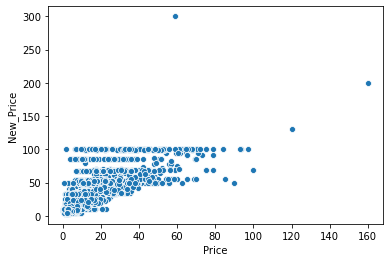

In [167]:
df_train = df[df.is_train==1]
sns.scatterplot(df_train['Price'], df_train['New_Price'])

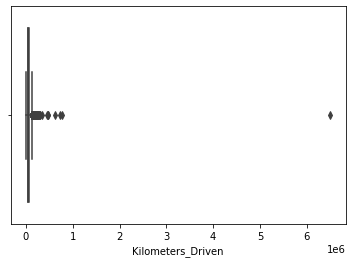

In [168]:
sns.boxplot(df['Kilometers_Driven'])

In [169]:
df['Kilometers_Driven'] = df['Kilometers_Driven'].apply(lambda x: 650000 if x>6000000 else x)

/Users/tusharrathod/anaconda3/lib/python3.7/site-packages/seaborn/categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
/Users/tusharrathod/anaconda3/lib/python3.7/site-packages/seaborn/categorical.py:3672: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


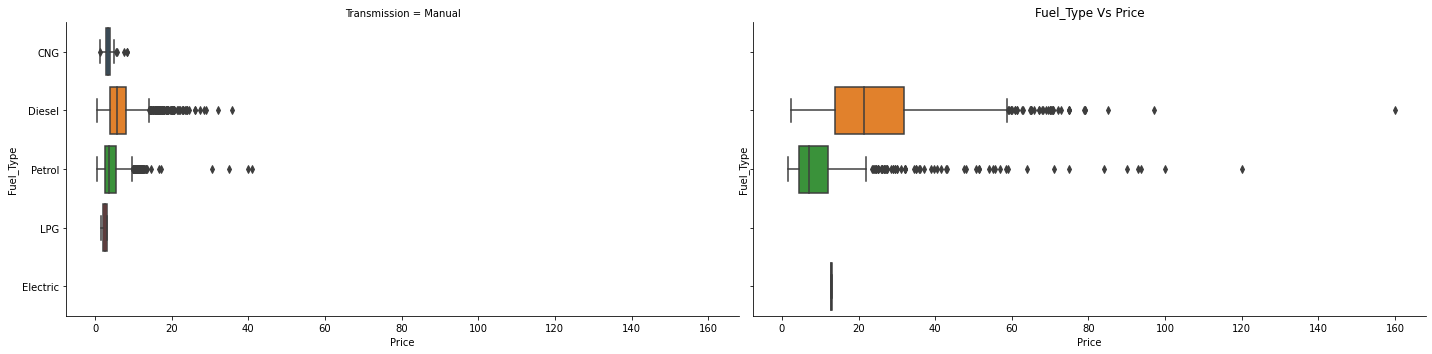

In [173]:
mx = sns.factorplot(y="Fuel_Type", x="Price", data=df_train, col='Transmission',kind="box", size=5 ,aspect=2)
mx.set(xlabel='Price')
mx.set(ylabel= 'Fuel_Type')
plt.title('Fuel_Type Vs Price');
plt.show()

In [174]:
df.Fuel_Type.value_counts()

Diesel      3852
Petrol      3325
CNG           62
LPG           12
Electric       2
Name: Fuel_Type, dtype: int64

In [176]:
df = df.drop(df.loc[(df['Fuel_Type']=='Electric') ].index.tolist()).reset_index(drop=True)

/Users/tusharrathod/anaconda3/lib/python3.7/site-packages/seaborn/categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
/Users/tusharrathod/anaconda3/lib/python3.7/site-packages/seaborn/categorical.py:3672: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


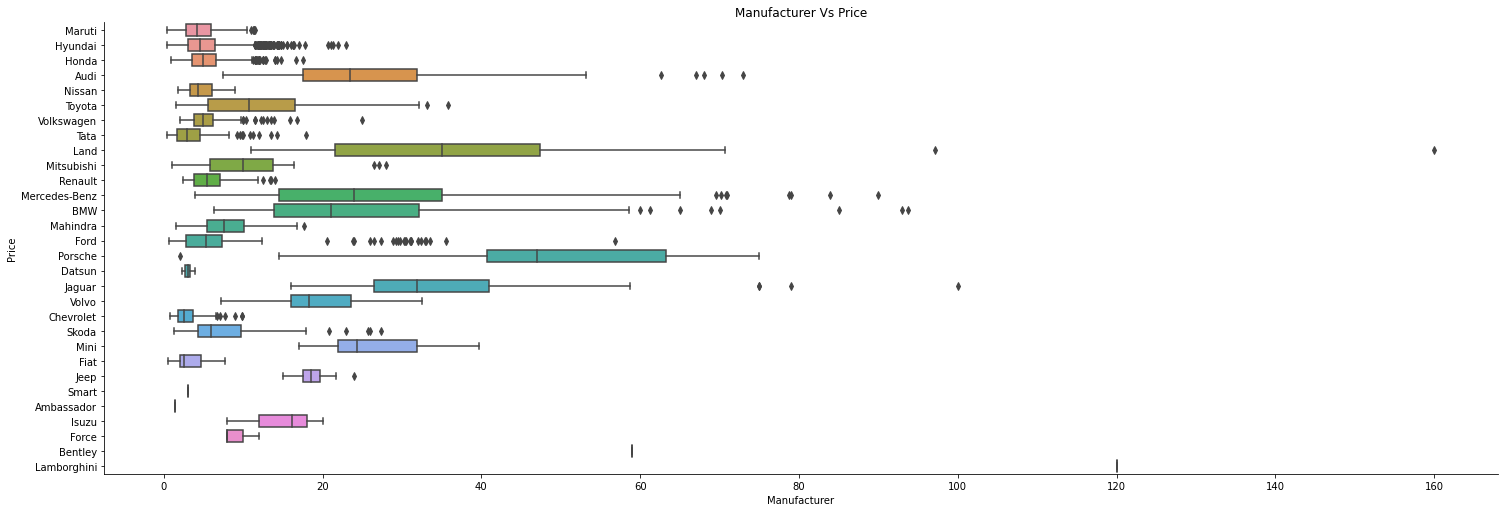

In [178]:
mx = sns.factorplot(y="Manufacturer", x="Price", data=df_train, kind="box", size=7 ,aspect=3)
mx.set(xlabel='Manufacturer')
mx.set(ylabel= 'Price')
plt.title('Manufacturer Vs Price');
plt.show()

In [179]:
# Porsche cant be at this low price
df = df.drop(df.loc[(df['Manufacturer']=='Porsche') & (df['Price']<3)].index.tolist()).reset_index(drop=True)

In [180]:
df_train.loc[ (df_train['Manufacturer']=='Land') & (df_train['Price']>120) ]

,Name,Location,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price,is_train,Manufacturer,Model,Car_Age,Cur
4079,Land Rover Range Rover 3.0 Diesel LWB Vogue,Hyderabad,25000,Diesel,Automatic,First,13.33,2993,255,5.0,200.0,160.0,1,Land,Rover,3,Cr


# Feature Engineering

In [181]:
def premium(pro):
    if(pro in ["Maruti","Hyundai",'Honda','Ford','Mahindra','Tata','Renault'
              ,'Chevrolet','Nissan','Fiat','Datsun','Ambassador','Hindustan'
              ,'Smart']):
        pro = 0
    else:
        pro = 1
    return pro
      
df['is_premium'] = df['Manufacturer'].apply(premium)

In [182]:
def Exp_output(Ex):
    if (Ex in ['CNG','LPG']):
        Ex='LPG_CNG'
    return Ex
      
df['Fuel_Type'] = df['Fuel_Type'].apply(Exp_output)

In [183]:
df.head()

,Name,Location,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price,is_train,Manufacturer,Model,Car_Age,Cur,is_premium
0,Maruti Wagon R LXI CNG,Mumbai,72000,LPG_CNG,Manual,First,26.6,998,58.16,5.0,5.0,1.75,1,Maruti,Wagon,10,Lakh,0
1,Hyundai Creta 1.6 CRDi SX Option,Pune,41000,Diesel,Manual,First,19.67,1582,126.2,5.0,16.0,12.50,1,Hyundai,Creta,5,Lakh,0
2,Honda Jazz V,Chennai,46000,Petrol,Manual,First,18.2,1199,88.7,5.0,8.0,4.50,1,Honda,Jazz,9,Lakh,0
3,Maruti Ertiga VDI,Chennai,87000,Diesel,Manual,First,20.77,1248,88.76,7.0,11.0,6.00,1,Maruti,Ertiga,8,Lakh,0
4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,40670,Diesel,Automatic,Second,15.2,1968,140.8,5.0,53.0,17.74,1,Audi,A4,7,Lakh,1


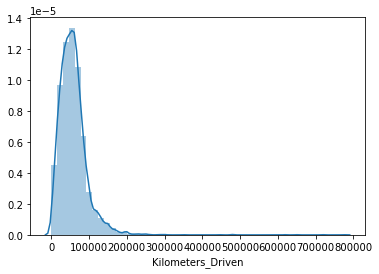

In [184]:
sns.distplot(df['Kilometers_Driven'])

In [186]:
df['Kilometers_Driven'] = np.log(df['Kilometers_Driven'])

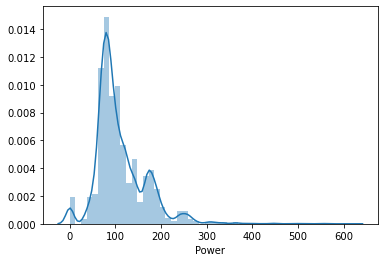

In [189]:
sns.distplot(df['Power'])

In [191]:
df.dtypes

Name                  object
Location              object
Kilometers_Driven    float64
Fuel_Type             object
Transmission          object
Owner_Type            object
Mileage               object
Engine                object
Power                 object
Seats                float64
New_Price            float64
Price                float64
is_train               int64
Manufacturer          object
Model                 object
Car_Age                int64
Cur                   object
is_premium             int64
dtype: object

In [192]:
convert_dict = {'Mileage': float, 
                'Engine': float,
                'Power' : float,
               } 
  
df = df.astype(convert_dict)

df.dtypes

Name                  object
Location              object
Kilometers_Driven    float64
Fuel_Type             object
Transmission          object
Owner_Type            object
Mileage              float64
Engine               float64
Power                float64
Seats                float64
New_Price            float64
Price                float64
is_train               int64
Manufacturer          object
Model                 object
Car_Age                int64
Cur                   object
is_premium             int64
dtype: object

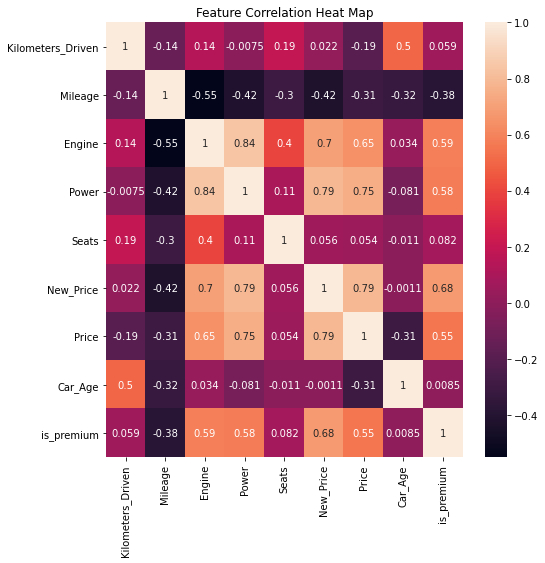

In [200]:
plt.figure(figsize =(8,8))
plt.title('Feature Correlation Heat Map')
sns.heatmap(df.drop(['is_train'], axis=1).corr(), annot=True)

In [201]:
df.columns

Index(['Name', 'Location', 'Kilometers_Driven', 'Fuel_Type', 'Transmission',
       'Owner_Type', 'Mileage', 'Engine', 'Power', 'Seats', 'New_Price',
       'Price', 'is_train', 'Manufacturer', 'Model', 'Car_Age', 'Cur',
       'is_premium'],
      dtype='object')

In [231]:
train_df = df[df.is_train == 1]
test_df = df[df.is_train == 0]

x = train_df[['Location', 'Kilometers_Driven', 'Fuel_Type', 'Transmission',
       'Owner_Type', 'Mileage', 'Engine', 'Power', 'Seats', 'New_Price',
       'Manufacturer', 'Car_Age', 'is_premium']]

y = train_df[['Price']]

x = pd.get_dummies(x, columns=['Location', 'Fuel_Type', 'Transmission', 'Owner_Type', 'Manufacturer'])

from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.3, random_state=99)

In [232]:
import xgboost as xgb
from sklearn.metrics import mean_squared_error, r2_score

xgb_model = xgb.XGBRegressor()
xgb_model.fit(x_train, y_train)

y_pred_train_xgb = xgb_model.predict(x_train)
y_pred_test_xgb = xgb_model.predict(x_test)

print("XGBoost Training RMSE", np.sqrt(mean_squared_error(y_train, y_pred_train_xgb)))
print("XGBoost Training R2 Score", r2_score(y_train, y_pred_train_xgb))
print('\n')
print("XGBoost Testing RMSE", np.sqrt(mean_squared_error(y_test, y_pred_test_xgb)))
print("XGBoost Training R2 Score", r2_score(y_test, y_pred_test_xgb))

print('\n RMSE for whole data', np.sqrt(mean_squared_error(y, xgb_model.predict(x))))

[15:26:02] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
XGBoost Training RMSE 2.1690598843263746
XGBoost Training R2 Score 0.9628537155235738


XGBoost Testing RMSE 3.007369395760827
XGBoost Training R2 Score 0.9257246944817467

 RMSE for whole data 2.4508773971070923


In [ ]:
(pd.Series(xgb_model.feature_importances_, index=x_train.columns)
   .nlargest(15)
   .plot(kind='barh'))  

In [258]:
#Without manufacturer because is_premiumcolumn is there 
train_df = df[df.is_train == 1]
test_df = df[df.is_train == 0]

x = train_df[['Location', 'Kilometers_Driven', 'Fuel_Type', 'Transmission',
       'Owner_Type', 'Mileage', 'Engine', 'Power', 'Seats', 'New_Price',
        'Car_Age', 'is_premium']]

y = train_df[['Price']]

x = pd.get_dummies(x, columns=['Location', 'Fuel_Type', 'Transmission', 'Seats', 'Owner_Type'])

x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.3, random_state=49)

xgb_model = xgb.XGBRegressor(learning_rate = 0.4, n_estimators=400)
xgb_model.fit(x_train, y_train)

y_pred_train_xgb = xgb_model.predict(x_train)
y_pred_test_xgb = xgb_model.predict(x_test)

print("XGBoost Training RMSE", np.sqrt(mean_squared_error(y_train, y_pred_train_xgb)))
print("XGBoost Training R2 Score", r2_score(y_train, y_pred_train_xgb))
print('\n')
print("XGBoost Testing RMSE", np.sqrt(mean_squared_error(y_test, y_pred_test_xgb)))
print("XGBoost Training R2 Score", r2_score(y_test, y_pred_test_xgb))

[15:41:27] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
XGBoost Training RMSE 0.8040023566458142
XGBoost Training R2 Score 0.9948741141242969


XGBoost Testing RMSE 2.740135501165984
XGBoost Training R2 Score 0.9389893716951765


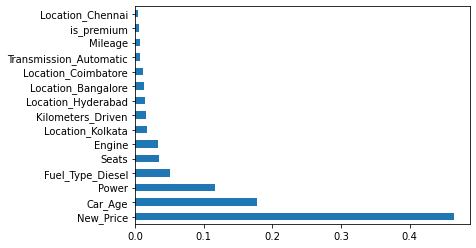

In [252]:
(pd.Series(xgb_model.feature_importances_, index=x_train.columns)
   .nlargest(15)
   .plot(kind='barh')) 

In [259]:
#LightGBM

In [264]:
import lightgbm as lgb
model_lgb = lgb.LGBMRegressor(objective='regression',num_leaves=35,
                              learning_rate=0.1, n_estimators=500,feature_fraction = 0.75,
                              feature_fraction_seed=9,min_data_in_leaf =15                          
                              )

model_lgb.fit(x_train, y_train)
lgb_train_pred = model_lgb.predict(x_train)
lgb_test_pred = model_lgb.predict(x_test)

print("LightGBM Training RMSE", np.sqrt(mean_squared_error(y_train, lgb_train_pred)))
print("LightGBM Training R2 Score", r2_score(y_train, lgb_train_pred))
print('\n')
print("LightGBM Testing RMSE", np.sqrt(mean_squared_error(y_test, lgb_test_pred)))
print("LightGBM Training R2 Score", r2_score(y_test, lgb_test_pred))

LightGBM Training RMSE 0.5928293320667007
LightGBM Training R2 Score 0.9972131495984249


LightGBM Testing RMSE 2.6995395255256835
LightGBM Training R2 Score 0.9407837638300841


In [268]:
from sklearn.ensemble import GradientBoostingRegressor
GBoost = GradientBoostingRegressor(n_estimators=500, learning_rate=0.1,
                                   max_depth=4,
                                   min_samples_leaf=15, min_samples_split=15, 
                                   loss='huber', random_state =5)
GBoost.fit(x_train, y_train)
gb_train_pred = GBoost.predict(x_train)
gb_test_pred = GBoost.predict(x_test)

print("Gradient Training RMSE", np.sqrt(mean_squared_error(y_train, gb_train_pred)))
print("Gradient Training R2 Score", r2_score(y_train, gb_train_pred))
print('\n')
print("Gradient Testing RMSE", np.sqrt(mean_squared_error(y_test, gb_test_pred)))
print("Gradient Training R2 Score", r2_score(y_test, gb_test_pred))

/Users/tusharrathod/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


Gradient Training RMSE 1.5187215948062325
Gradient Training R2 Score 0.9817101297005332


Gradient Testing RMSE 2.667382431481182
Gradient Training R2 Score 0.942186136677519


In [269]:
ens_test =  y_pred_test_xgb*0.35 + lgb_test_pred*0.35 + gb_test_pred*0.3
print("Ensemble Testing RMSE", np.sqrt(mean_squared_error(y_test, ens_test)))
print("Ensemble Training R2 Score", r2_score(y_test, ens_test))

Ensemble Testing RMSE 2.4521230667011613
Ensemble Training R2 Score 0.9511408458738219
